# Chapitre 2 : Données et distributions d'échantillonnage

La qualité des données est souvent plus importante que la quantité de données lorsqu'il s'agit d'établir une estimation ou un modèle à partir d'un échantillon. La qualité des données dans la science des données implique l'exhaustivité, la cohérence du format, la propreté et l'exactitude des points de données individuels. Les statistiques ajoutent la notion de représentativité.

In [31]:
%matplotlib inline 

import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
from scipy.stats import chi2_contingency

In [32]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [33]:
# Chargement des données

LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

## Théorème de la limite centrale

In [34]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

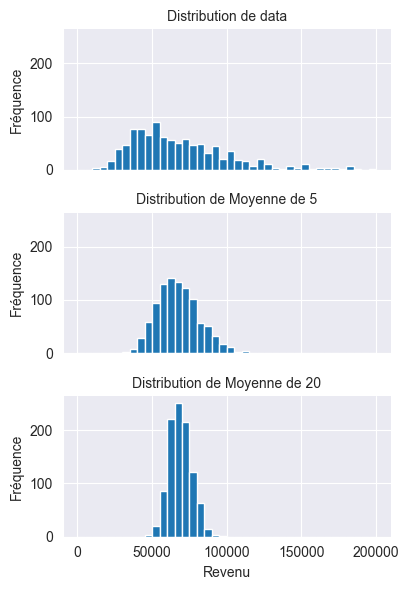

In [55]:
sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000),
    'type' : 'data',
})

sample_mean_5 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _ in range(1000)],
    'type' : 'Moyenne de 5',
})

sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)],
    'type' : 'Moyenne de 20',
})


results = pd.concat([sample_data, sample_mean_5, sample_mean_20])
#print(results)

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range = [0,200000], bins = 40)
g.set_axis_labels('Revenu', 'Fréquence')
g.set_titles('Distribution de {col_name}')

On voit ici que la distribution de la moyenne de 5 échantillons est plus resserrée que celle de la moyenne de 20 échantillons. Cela est dû au fait que la moyenne de 20 échantillons est plus proche de la moyenne de l'échantillon complet.

## Le Bootstrap


Le Bootstrap est une méthode de rééchantillonnage qui consiste à tirer aléatoirement des échantillons avec remplacement. Cette méthode est utilisée pour estimer l'erreur d'échantillonnage d'une statistique d'échantillonnage. Le Bootstrap est basé sur l'idée que la distribution empirique d'un échantillon est une bonne approximation de la distribution de la population.

In [54]:
results = []

for i in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
    
results = pd.Series(results)

print(f'Estimation du revenu médian : {results.median()}')
print(f'écart type du revenu médian : {results.std()}')
print('Biais = Médiane - Moyenne: ', results.mean() - loans_income.median())
    
    

Estimation du revenu médian : 62000.0
écart type du revenu médian : 230.43081342894996
Biais = Médiane - Moyenne:  -81.03650000000198


## Intervalles de confiance

68760.51844
55734.1
[43212.45, 70233.43999999999]


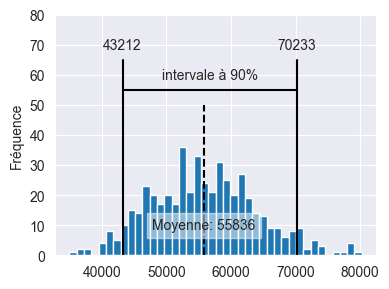

In [53]:
print(loans_income.mean())
np.random.seed(seed=3)  

sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []

for _ in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))

print(confidence_interval)

ax = results.plot.hist(bins=40, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, 'intervale à 90%',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()

ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Moyenne: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

## Distribution Normale

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

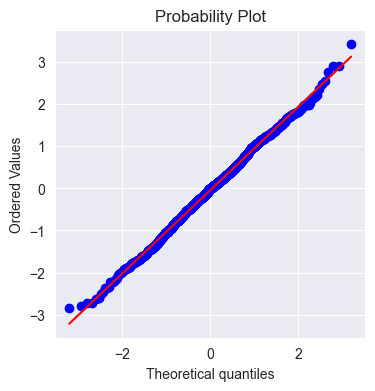

In [38]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=1000)
stats.probplot(norm_sample, plot=ax)

## Distribution à queue lourde

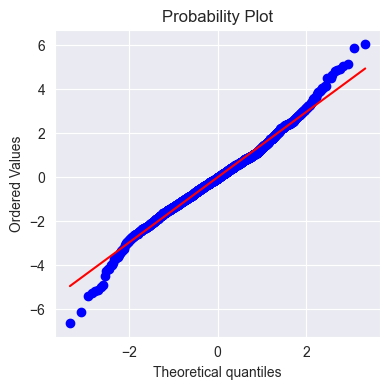

In [39]:
sp500 = pd.read_csv(SP500_DATA_CSV)
nflx = sp500.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

### La distribution T de Student

AttributeError: module 'matplotlib.pyplot' has no attribute 'dshow'

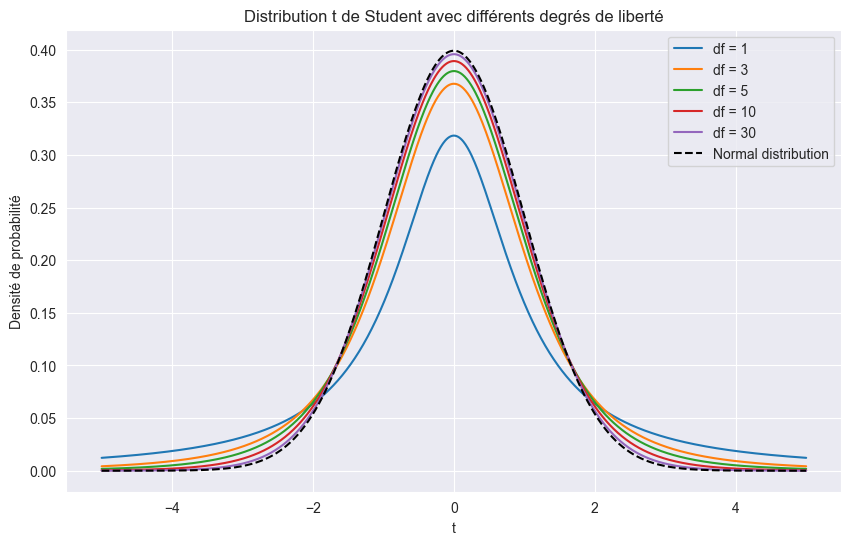

In [40]:
x = np.linspace(-5, 5, 1000)

dfs = [1, 3, 5, 10, 30]

plt.figure(figsize=(10, 6))

for df in dfs:
    y = stats.t.pdf(x, df)
    plt.plot(x, y, label=f'df = {df}')

y_norm = stats.norm.pdf(x)
plt.plot(x, y_norm, 'k--', label='Normal distribution')

plt.title('Distribution t de Student avec différents degrés de liberté')
plt.xlabel('t')
plt.ylabel('Densité de probabilité')
plt.legend()
plt.grid(True)
plt.dshow()

### Distribution Binomiale

Pour calculer la probabilité d'obtenir exactement 2 succès dans 5 essais avec une probabilité de succès de 0.1 pour chaque essai, on utilise la fonction de masse de probabilité (PMF). La probabilité d'obtenir exactement 2 succès est de 0.0729.

La probabilité cumulative d'obtenir jusqu'à 2 succès (c'est-à-dire 0, 1, ou 2 succès) dans 5 essais est de 0.99144. Cette probabilité cumulative est calculée à l'aide de la fonction de distribution cumulative (CDF).

Les formules utilisées sont respectivement :

- **Fonction de Masse de Probabilité (PMF)** :
  
  $$
  P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
  $$

  où :
  - \( \binom{n}{k} \) est le coefficient binomial, calculé comme \( \frac{n!}{k! (n - k)!} \)
  - \( n \) est le nombre total d'essais
  - \( k \) est le nombre de succès
  - \( p \) est la probabilité de succès lors de chaque essai
  - \( (1 - p) \) est la probabilité d'échec lors de chaque essai

- **Fonction de Distribution Cumulative (CDF)** :
  
  $$
  P(X \leq k) = \sum_{i=0}^{k} \binom{n}{i} p^i (1 - p)^{n - i}
  $$

LA moyenne de la distribution binomiale est donnée par la formule suivante : 
$$ \mu = n \cdot p $$

La variance de la distribution binomiale est donnée par la formule suivante : 
$$ \sigma^2 = n \cdot p \cdot (1 - p) $$

Lorsque p = 0.5, la distribution binomiale est symétrique et est assimilable à une distribution normale. Lorsque p < 0.5, la distribution est asymétrique avec une queue plus longue du côté des échecs. Lorsque p > 0.5, la distribution est asymétrique avec une queue plus longue du côté des succès.

In [44]:
print(f"Fonction de probabilité de masse {stats.binom.pmf(2,n=5,p=0.1)}")
print(f"Probabilité cumulée {stats.binom.cdf(2,n=5,p=0.1)}")

Fonction de probabilité de masse 0.07289999999999992
Probabilité cumulée 0.99144


### Distribution Chi-carré

La formule de la statistique du chi-carré pour un tableau de contingence avec \( r \) lignes et \( c \) colonnes est :

$$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

où :
- \( O_{ij} \) est la fréquence observée dans la cellule \( (i, j) \) du tableau de contingence,
- \( E_{ij} \) est la fréquence attendue dans la cellule \( (i, j) \) sous l'hypothèse nulle d'indépendance des lignes et des colonnes.

La somme est effectuée sur toutes les cellules du tableau de contingence.

La statistique du chi-carré est une méthode pour évaluer si les décomptes observés dans différentes catégories s'écartent de manière significative des décomptes attendus sous l'hypothèse nulle.


In [45]:
# Exemple de tableau de contingence (observé)
# Les lignes représentent le genre (Homme, Femme)
# Les colonnes représentent la promotion (Promu, Non promu)
tableau_contingence = np.array([[30, 10],  # Hommes
                                [20, 25]]) # Femmes

# Affichage du tableau de contingence
print(f"Tableau de contingence observé : {tableau_contingence}")

chi2, p, dof, expected = chi2_contingency(tableau_contingence)

# Affichage des résultats
print(f"Statistique du chi-carré : {chi2}")
print(f"P-valeur : {p}")
print(f"Degrés de liberté : {dof}")
print(f"Fréquences attendues sous l'hypothèse nulle :{expected}")

Tableau de contingence observé : [[30 10]
 [20 25]]
Statistique du chi-carré : 6.949930555555551
P-valeur : 0.00838224869725173
Degrés de liberté : 1
Fréquences attendues sous l'hypothèse nulle :[[23.52941176 16.47058824]
 [26.47058824 18.52941176]]


## Distribution de Poisson

La probabilité d'observer exactement \( k \) événements dans un intervalle donné est donnée par la formule de la distribution de Poisson :

$$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

- \( X \) est une variable aléatoire qui suit une distribution de Poisson.
- \( k \) est le nombre d'événements observés (0, 1, 2, ...).
- \( \lambda \) (lambda) est le paramètre de la distribution, qui représente à la fois la moyenne et la variance des événements.
- \( e \) est la base du logarithme naturel (environ 2.71828).

#### Propriétés

- **Moyenne et Variance** : Pour une distribution de Poisson, la moyenne et la variance sont toutes deux égales à \( \lambda \).
  - Moyenne : \( E(X) = \lambda \)
  - Variance : \( \text{Var}(X) = \lambda \)

- **Applicabilité** : La distribution de Poisson est souvent utilisée pour modéliser des événements rares mais dont le nombre moyen d'occurrences est connu.

In [50]:
stats.poisson.rvs(2, size=100)


array([2, 1, 3, 0, 1, 3, 2, 2, 3, 5, 3, 1, 5, 1, 1, 5, 0, 3, 2, 4, 0, 2,
       3, 0, 4, 0, 0, 1, 2, 0, 1, 3, 3, 6, 3, 3, 2, 4, 2, 1, 1, 4, 0, 2,
       2, 0, 3, 2, 4, 3, 1, 3, 5, 1, 3, 2, 1, 0, 3, 1, 0, 2, 2, 1, 1, 3,
       4, 2, 3, 4, 1, 3, 2, 2, 0, 1, 1, 1, 4, 1, 1, 2, 2, 1, 1, 1, 2, 3,
       1, 3, 3, 3, 1, 0, 2, 1, 5, 3, 1, 2])

## Distribution Exponentielle

La distribution exponentielle est une distribution continue qui décrit le temps entre les occurrences d'événements dans un processus de Poisson, où les événements se produisent de manière indépendante à un taux constant \( \lambda \).

#### Formulation

La fonction de densité de probabilité (pdf) de la distribution exponentielle pour une variable aléatoire \( X \) est donnée par :

\[ f(x; \lambda) = 
\begin{cases} 
\lambda e^{-\lambda x} & \text{si } x \geq 0 \\
0 & \text{sinon}
\end{cases}
\]

- \( X \) est une variable aléatoire qui suit une distribution exponentielle.
- \( \lambda \) (lambda) est le paramètre de taux (ou paramètre de la distribution), où \( \lambda > 0 \).
- \( e \) est la base du logarithme naturel (environ 2.71828).

#### Propriétés

- **Moyenne et Variance** : Pour une distribution exponentielle \( \text{Exp}(\lambda) \),
  - Moyenne : \( E(X) = \frac{1}{\lambda} \)
  - Variance : \( \text{Var}(X) = \frac{1}{\lambda^2} \)

- **Applicabilité** : La distribution exponentielle est couramment utilisée pour modéliser des durées de temps entre des événements rares mais où le taux moyen d'occurrence est connu, comme le temps entre les appels téléphoniques, les intervalles entre pannes dans un système, etc.

In [47]:
stats.expon.rvs(scale=1/0.2, size=100)
stats.expon.rvs(scale=5, size=100)

array([3.27294805e+00, 1.04428715e+01, 5.20972655e+00, 9.98917798e-01,
       9.70085693e-01, 1.90439785e+00, 1.41944702e+00, 8.01030811e+00,
       5.60987559e+00, 4.84021287e-01, 2.73028919e+00, 1.17235471e+01,
       3.84046321e+00, 1.09299540e+01, 1.89759989e+01, 3.15591909e-01,
       1.06705697e+00, 3.96289884e+00, 4.67024028e+00, 2.34383844e+00,
       7.36668700e+00, 4.24758906e+00, 6.23244783e+00, 1.10422798e+01,
       9.15197706e+00, 3.80858186e+00, 4.24410546e+00, 8.66188412e+00,
       1.31380707e+01, 8.78254625e+00, 5.10795654e+00, 6.93336169e-01,
       7.49014692e+00, 2.24775133e-01, 1.56490378e+01, 5.91211582e+00,
       4.61291907e-01, 3.72519047e+00, 6.89504553e+00, 8.00443908e-01,
       1.93663699e+00, 2.17726500e-02, 5.88849309e+00, 4.89653009e+00,
       6.36031726e+00, 6.14164843e+00, 1.16771140e+01, 4.81785940e+00,
       1.33850539e+00, 1.51185801e+00, 1.37899060e+00, 4.49695097e+00,
       8.19281633e-01, 4.66531392e+00, 4.03877009e+00, 1.39957099e+00,
      

## Distribution de Weibull

La distribution de Weibull est une distribution continue utilisée pour modéliser des durées de vie, des temps de défaillance, ou d'autres phénomènes où le taux d'occurrence des événements varie avec le temps.

#### Formulation

La fonction de densité de probabilité (pdf) de la distribution de Weibull pour une variable aléatoire \( X \) est donnée par :

\[ f(x; \lambda, k) = 
\begin{cases} 
\frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-(x/\lambda)^k} & \text{si } x \geq 0 \\
0 & \text{sinon}
\end{cases}
\]

- \( X \) est une variable aléatoire qui suit une distribution de Weibull.
- \( \lambda \) (lambda) est le paramètre d'échelle, déterminant l'étendue de la distribution.
- \( k \) est le paramètre de forme (ou paramètre de la distribution), influençant la forme de la courbe de distribution.

**Applicabilité** : La distribution de Weibull est largement utilisée dans l'ingénierie, les sciences de la santé et d'autres domaines pour modéliser des durées de vie, des temps de défaillance, et des taux de survie où le risque varie au fil du temps.

In [51]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 3973.0244128 ,  1122.08726345,  4966.41663407,  2718.52727908,
        6647.77812474,  1075.60535254,  4525.05943441,  1855.12543206,
         803.98250679,   915.95446815,  7029.66432626,  6316.33651418,
        5065.3149978 ,  7805.01628213,   351.3654492 , 11138.76235241,
        1950.49045243,  5270.18429415,  1681.43635955,  2438.05152529,
        6266.89128111,  2789.2461274 , 14813.26157119,  4235.67259414,
        3303.24577275, 16001.100893  ,  6830.86452753,  4558.9837936 ,
       10424.6795836 ,  3212.70459217,  1843.23785116,  5873.50980559,
        2829.20658038,  1952.79698041,  6559.64832424,  3432.37845614,
        6943.2531206 ,  8420.03328927,   846.71489539,  6844.01540383,
        5182.39361125,  2591.92705441,  1379.28441686,  3685.22440109,
        4252.2774373 , 12231.42619035,  4484.49297309,  1345.45647907,
        4789.31074373,  8000.45116886,  4998.69567949,  6917.61176138,
         875.68640159,  1175.29530726,  8663.93643176,   844.10740748,
      